# Probability

## Throwing a coin or a die

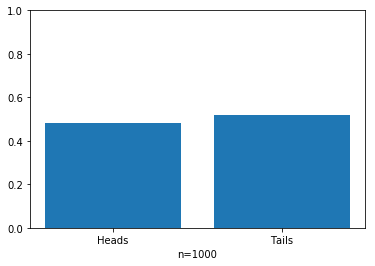

In [3]:
n_samples = 100
n_outcomes = 2

import matplotlib.pylab as plt
import numpy as np
import time
from IPython import display
%matplotlib inline

fps = 20
fig, ax = plt.subplots()
ax.set_ylim((0, 1))
title = plt.xlabel("n=%i" % 0)
if n_outcomes == 2:
    labels = ['Heads', 'Tails']
else:
    labels = ["Side %i" % (i+1) for i in range(n_outcomes)]
h = ax.bar(labels, np.zeros(n_outcomes), align='center')#, color=plt.get_cmap('Pastel1'))

outcomes = np.zeros(n_outcomes)

for n in range(n_samples):
    t = time.time()
    outcomes[np.random.randint(n_outcomes)] += 1
    try:
        display.display(plt.gcf())
        display.clear_output(wait=True)
        title.set_text("n=%i" % (n+1))
        for i in range(n_outcomes):
            h[i].set_height(outcomes[i]/np.sum(outcomes))
        time.sleep(max(0, t+1/fps-time.time()))
    except KeyboardInterrupt:
        break

## Peach's and Yoshi's dice game

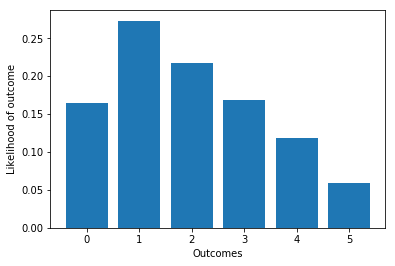

In [4]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

dice = np.random.randint(6, size=(10000, 2))+1
difference = np.abs(dice[:, 0] - dice[:, 1])

X = np.unique(difference)
h = [np.sum(difference==x) for x in X]
h /= np.sum(h)
plt.bar(X, h)
plt.xlabel("Outcomes")
plt.ylabel("Likelihood of outcome")
plt.show()

## Financial market


Number of ruined investors: 0
Better luck with money in a mattress: 14
min: 234.45
median: 2851.665
max: 44083.56


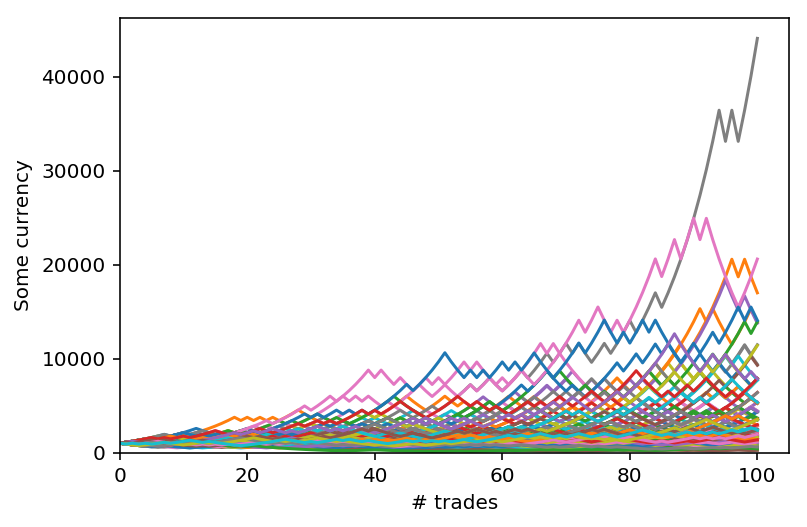

In [5]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def make_trade(investment, cost_of_trade):
    """Function for making a trade"""
    if np.random.rand() < .55:
        investment *= 1.10
    else:
        investment *= (1/1.10)
    ret = np.floor(investment*100)/100
    ret -= cost_of_trade
    ret = ret if ret > 0 else 0
    return ret

# Some important constants
n_trades = 100
n_investors = 100
initial_savings = 1000
cost_of_trade = 1

M = np.zeros((n_investors, n_trades+1))
M[:, 0] = initial_savings
for i in range(1, n_trades+1):
    for j in range(n_investors):
        M[j, i] = make_trade(M[j, i-1], cost_of_trade)

print("Number of ruined investors:", np.sum(np.isclose(M[:, -1], 0)))
print("Better luck with money in a mattress:", np.sum(M[:, -1]<initial_savings))
print("min:", np.min(M[:, -1]))
print("median:", np.median(M[:, -1]))
print("max:", np.max(M[:, -1]))

for j in range(n_investors):
    plt.plot(M[j, :], '-')
plt.ylabel("Some currency")
plt.xlabel("# trades")
# Ensure plot starts at 0
a = list(plt.axis())
a[0] = 0
a[2] = 0
plt.axis(a);

## Monty Hall

In [11]:
import random
import numpy as np

def monty_hall_simulation(print_variables=True):
    door_with_car = np.random.randint(3)
    first_choice = np.random.randint(3)
    doors_not_chosen = set([0, 1, 2])
    doors_not_chosen.discard(first_choice)
    doors_not_chosen.discard(door_with_car)
    opened_door = random.choice(list(doors_not_chosen))
    switch_door = random.choice([True, False])
    if switch_door:
        did_we_win = first_choice != door_with_car
    else:
        did_we_win = first_choice == door_with_car
    if print_variables:
        print("Door with car:", door_with_car)
        print("We choose door:", first_choice)
        print("Host opens door:", opened_door)
        print("We choose to switch:", switch_door)
        print("Are we a winner:", did_we_win)
    return (did_we_win, switch_door)
            
monty_hall_simulation();

Door with car: 1
We choose door: 0
Host opens door: 2
We choose to switch: True
Are we a winner: True


p(win | switch door) = 67.8%
p(win | stand by choice) = 32.2%


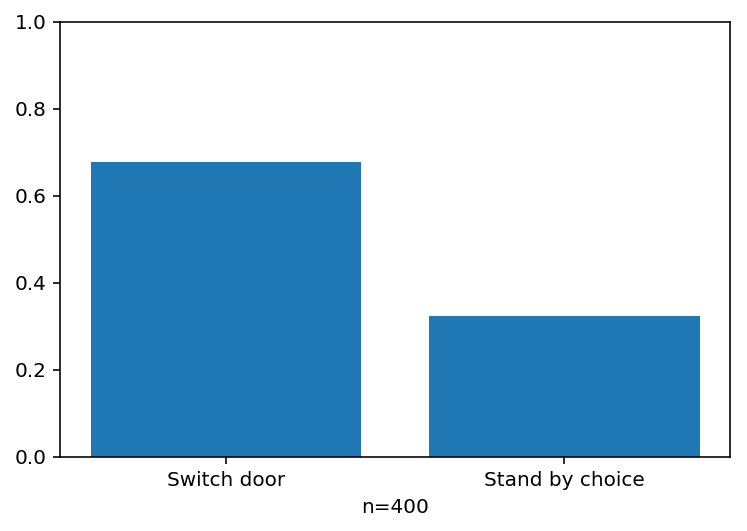

In [12]:
n_samples = 400

import matplotlib.pylab as plt
import numpy as np
import time
from IPython import display
%matplotlib inline

fps = 20
fig, ax = plt.subplots()
ax.set_ylim((0, 1))
title = plt.xlabel("n=%i" % 0)
labels = ['Switch door', 'Stand by choice']
h = ax.bar(labels, np.zeros(len(labels)), align='center')#, color=plt.get_cmap('Pastel1'))

outcomes = np.zeros(2)

for n in range(n_samples):
    t = time.time()
    win, switch = monty_hall_simulation(print_variables=False)
    if switch and win:
        outcomes[0] += 1
    elif not switch and win:
        outcomes[1] += 1
    try:
        display.display(plt.gcf())
        display.clear_output(wait=True)
        title.set_text("n=%i" % (n+1))
        for i in range(2):
            h[i].set_height(outcomes[i]/np.sum(outcomes))
        time.sleep(max(0, t+1/fps-time.time()))
    except KeyboardInterrupt:
        break

print("p(win | switch door) = %.1f%%" % (100*outcomes[0]/np.sum(outcomes)))
print("p(win | stand by choice) = %.1f%%" % (100*outcomes[1]/np.sum(outcomes)))

## Income distribution

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n_population = 10000
n_groups = 4
n_timesteps = 12*30
prob_of_choice = [.49, .51, .45, .55]
initial_income = 16000

income = np.ones((n_groups, n_population//n_groups))*initial_income
for t in range(n_timesteps):
    for group in range(n_groups):
        gets_increase = np.random.rand(income.shape[1]) < prob_of_choice[group]
        income[group, gets_increase] *= 1.01
        income[group, np.invert(gets_increase)] *= (1/1.01)
    #income *=1.01
    income *= 1.0 + np.random.rand(income.shape[1])*0.005

fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.subplots(1,2)
ax[0].set_title("Histogram in final income")
ax[0].set_ylabel("# people")
ax[0].set_xlabel("Income")
ax[1].set_title("Percentiles of final income")
ax[1].set_ylabel("Income")
ax[1].set_xlabel("Percentile")

for group in range(n_groups):
    ax[0].hist(income[group, :], min(n_timesteps, 50), alpha=.5)

width = 1
X = np.arange(1, 100, width)
for group, colour in zip(range(n_groups), ['r', 'b', 'g', 'c']):
    Y = np.asarray([np.percentile(income[group, :], x) for x in X])
    ax[1].bar(X, Y, width, color=colour, alpha=.5)

plt.show()


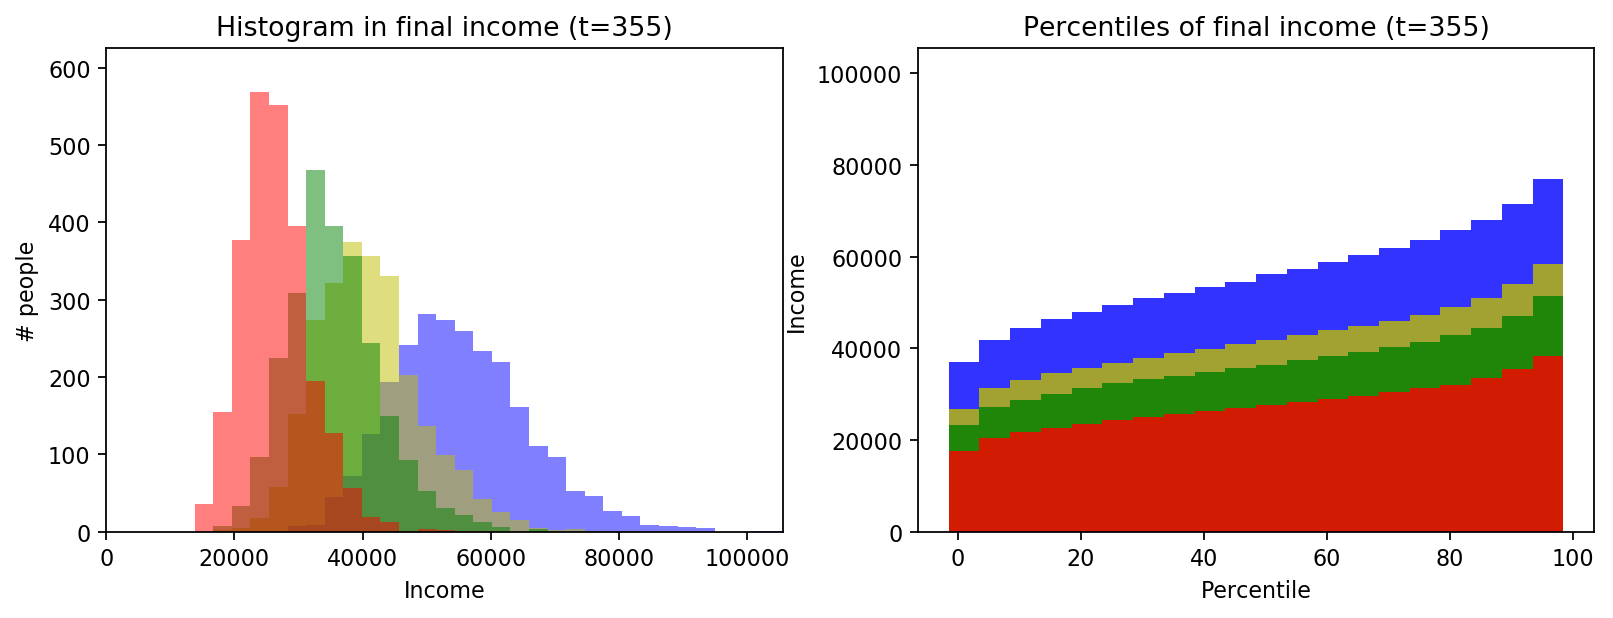

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import time

# Constants
n_population = 10000
n_groups = 4
n_timesteps = 12*30
prob_of_choice = [.49, .51, .45, .55]
initial_income = 16000
improvement_factor = 1.01
constant_improvement_factor = 1.005

# Create the simulation data
prob_of_choice = prob_of_choice[:n_groups]
prob_of_choice.sort()
prob_of_choice = prob_of_choice[::-1]
income = np.ones((n_groups, n_population//n_groups))*initial_income

# Set up plotting
fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.subplots(1,2)
title1 = ax[0].set_title("Histogram in final income (t=%i)" % 0)
ax[0].set_ylabel("# people")
ax[0].set_xlabel("Income")
title2 = ax[1].set_title("Percentiles of final income (t=%i)" % 0)
ax[1].set_ylabel("Income")
ax[1].set_xlabel("Percentile")
c1 = improvement_factor**(n_timesteps//2)
c2 = constant_improvement_factor**(n_timesteps//2)
hist_range = np.linspace(np.floor(initial_income/c1*c2), np.ceil(initial_income*c1*c2), min(n_timesteps, 80))

hist_width = hist_range[1] - hist_range[0]
X = np.asarray([np.mean(hist_range[i:i+1]) for i in range(hist_range.shape[0]-1)])

indices = np.asarray((income - hist_range[0])/hist_width, dtype=np.int)
hist_bar_by_group = [None]*n_groups
for group, colour in zip(range(n_groups), ['b', 'y', 'g', 'r']):
    Y = np.zeros(X.shape)
    for i in range(len(X)):
        Y[i] = np.sum(indices[group, :]==i)
    hist_bar_by_group[group] = ax[0].bar(X, Y, hist_width, color=colour, alpha=.5)

percentile_bar_width = 5
X = np.arange(1, 100, percentile_bar_width)
percentile_bar_by_group = [None]*n_groups
for group, colour in zip(range(n_groups), ['b', 'y', 'g', 'r']):
    Y = np.asarray([np.percentile(income[group, :], x) for x in X])
    percentile_bar_by_group[group] = ax[1].bar(X, Y, percentile_bar_width, color=colour, alpha=.8)


for t in range(n_timesteps):
    # Run a simulation time step
    for group in range(n_groups):
        gets_increase = np.random.rand(income.shape[1]) < prob_of_choice[group]
        income[group, gets_increase] *= improvement_factor
        income[group, np.invert(gets_increase)] *= (1/improvement_factor)
#    income *= constant_improvement_factor
    income *= 1.0 + np.random.rand(income.shape[1])*(constant_improvement_factor - 1.0)

    if t % 5 == 0:
        # Prepare screen for graphics update
        display.display(plt.gcf())
        display.clear_output(wait=True)

        # New plots
        title1.set_text("Histogram in final income (t=%i)" % t)
        title2.set_text("Percentiles of final income (t=%i)" % t)

        X = np.asarray([np.mean(hist_range[i:i+1]) for i in range(hist_range.shape[0]-1)])
        indices = np.asarray((income - hist_range[0])/hist_width, dtype=np.int)
        for group in range(n_groups):
            Y = np.zeros(X.shape)
            for i in range(len(X)):
                Y[i] = np.sum(indices[group, :]==i)
            for i, y in enumerate(Y):
                hist_bar_by_group[group][i].set_height(y)    

        X = np.arange(1, 100, percentile_bar_width)
        for group in range(n_groups):
            Y = np.asarray([np.percentile(income[group, :], x) for x in X])
            for i, y in enumerate(Y):
                percentile_bar_by_group[group][i].set_height(y)

        ax[0].set_ylim(0, n_population/n_groups/4)
        ax[0].set_xlim(0, max(initial_income*2, np.max(income)))
        ax[1].set_ylim(0, np.max(income))
    
    #time.sleep(.0005)
